<a href="https://colab.research.google.com/github/Oksana0020/DL-with-PyTorch/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab2. BuildYourOwnPerceptronforBinaryClassification

Key Points
The perceptron is the fundamental building block of neural networks, capable of learning linear decision boundaries
The perceptron learning rule adjusts weights based on prediction errors to minimize misclassifications
Learning rate selection significantly impacts training speed and final model performance
Visualization is a powerful tool for understanding model behavior and debugging issues

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.datasets import make_classification

Task 1: Dataset setup

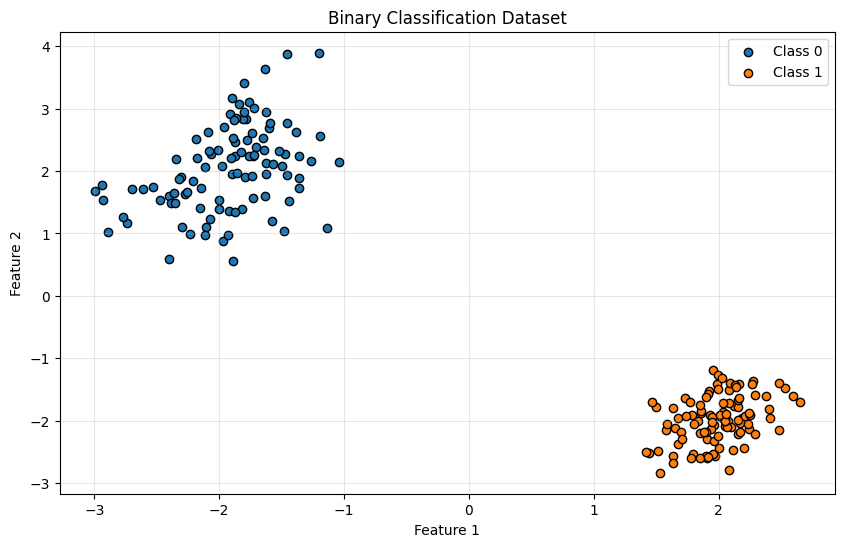

In [3]:

# Task 1: Dataset Setup
# Generate synthetic dataset
X_np, y_np = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=2,
    random_state=88
)

# Convert to PyTorch tensors
X = torch.tensor(X_np, dtype=torch.float32)
y = torch.tensor(y_np, dtype=torch.float32)

# Visualize dataset
plt.figure(figsize=(10, 6))
for class_value in np.unique(y_np):
    plt.scatter(
        X_np[y_np == class_value, 0],
        X_np[y_np == class_value, 1],
        label=f'Class {class_value}',
        edgecolors='k'
    )

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Task 2: Implementing the Perceptron

In [4]:

# Task 2: Implementing the Perceptron
class Perceptron:
    def __init__(self, input_dim, learning_rate=0.01):
        # Initialize weights and bias
        self.weights = torch.randn(input_dim, requires_grad=False) * 0.01
        self.bias = torch.zeros(1, requires_grad=False)
        self.learning_rate = learning_rate

    def forward(self, x):
        # Calculate the weighted sum and apply activation
        weighted_sum = torch.dot(self.weights, x) + self.bias
        return torch.sigmoid(weighted_sum)

    def predict(self, x):
        # Make binary prediction
        return 1 if self.forward(x) >= 0.5 else 0

    def update(self, x, target):
        # Calculate prediction and error
        prediction = self.forward(x)
        error = target - prediction

        # Update weights and bias using perceptron learning rule
        self.weights += self.learning_rate * error * x
        self.bias += self.learning_rate * error


Task 3: Training the Perceptron

Epoch 0: Accuracy = 100.00%
Epoch 2: Accuracy = 100.00%
Epoch 4: Accuracy = 100.00%
Epoch 6: Accuracy = 100.00%
Epoch 8: Accuracy = 100.00%
Epoch 10: Accuracy = 100.00%
Epoch 12: Accuracy = 100.00%
Epoch 14: Accuracy = 100.00%
Epoch 16: Accuracy = 100.00%
Epoch 18: Accuracy = 100.00%


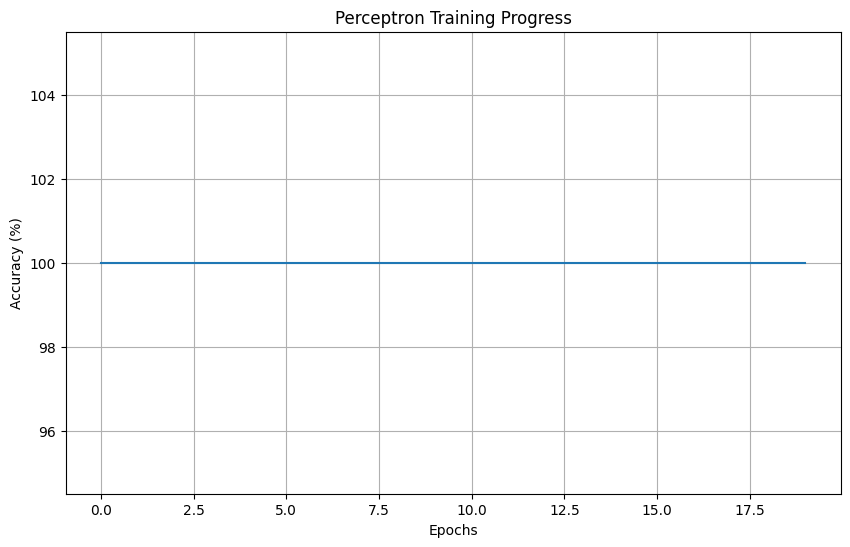

In [5]:

# Task 3: Training the Perceptron
def train_perceptron(model, X, y, epochs=20):
    accuracies = []
    stored_weights = []

    for epoch in range(epochs):
        # Create a permutation for shuffling
        indices = torch.randperm(len(X))

        # Training loop
        for i in indices:
            model.update(X[i], y[i])

        # Calculate and store accuracy
        accuracy = calculate_accuracy(model, X, y)
        accuracies.append(accuracy)

        # Store weights every 10 epochs
        if epoch % 2 == 0:
            stored_weights.append((epoch, model.weights.clone(), model.bias.clone()))

        if epoch % 2 == 0:
            print(f"Epoch {epoch}: Accuracy = {accuracy:.2f}%")

    return accuracies, stored_weights

def calculate_accuracy(model, X, y):
    correct = 0
    for i in range(len(X)):
        pred = model.predict(X[i])
        if pred == y[i]:
            correct += 1
    return correct / len(X) * 100

# Initialize and train perceptron
perceptron = Perceptron(input_dim=2, learning_rate=0.05)
accuracies, stored_weights = train_perceptron(perceptron, X, y)

# Plot accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Perceptron Training Progress')
plt.grid(True)
plt.show()


Task 4: Decision Boundary Visualization

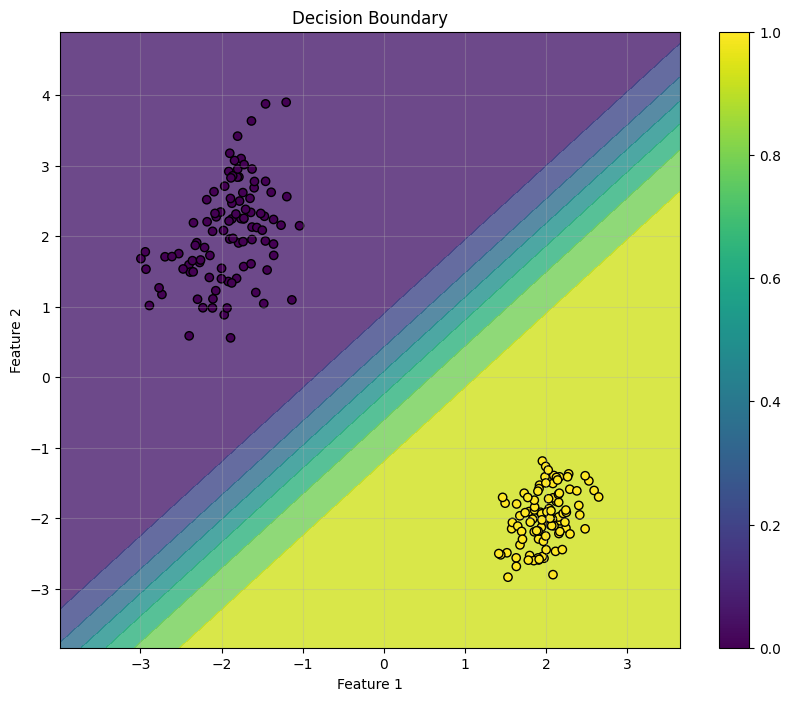

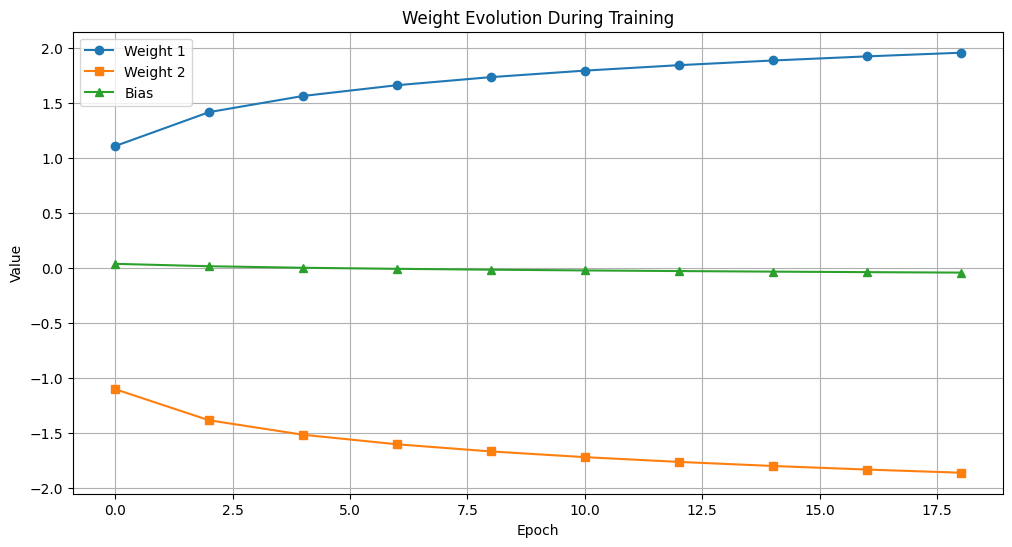

In [6]:

# Task 4: Decision Boundary Visualization
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Get predictions for each point in the mesh
    Z = np.zeros(xx.shape)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            point = torch.tensor([xx[i, j], yy[i, j]], dtype=torch.float32)
            Z[i, j] = model.forward(point).item()

    # Plot decision boundary
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.colorbar()
    plt.show()

# Plot final decision boundary
plot_decision_boundary(perceptron, X_np, y_np)

# Visualize weight evolution
def plot_weight_evolution(stored_weights):
    epochs = [item[0] for item in stored_weights]
    w1_values = [item[1][0].item() for item in stored_weights]
    w2_values = [item[1][1].item() for item in stored_weights]
    bias_values = [item[2].item() for item in stored_weights]

    plt.figure(figsize=(12, 6))
    plt.plot(epochs, w1_values, 'o-', label='Weight 1')
    plt.plot(epochs, w2_values, 's-', label='Weight 2')
    plt.plot(epochs, bias_values, '^-', label='Bias')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Weight Evolution During Training')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_weight_evolution(stored_weights)


Task 5: Experimentation with Learning Rates


Training with learning rate: 0.001
Epoch 0: Accuracy = 100.00%
Epoch 2: Accuracy = 100.00%
Epoch 4: Accuracy = 100.00%
Epoch 6: Accuracy = 100.00%
Epoch 8: Accuracy = 100.00%
Epoch 10: Accuracy = 100.00%
Epoch 12: Accuracy = 100.00%
Epoch 14: Accuracy = 100.00%
Epoch 16: Accuracy = 100.00%
Epoch 18: Accuracy = 100.00%

Training with learning rate: 0.01
Epoch 0: Accuracy = 100.00%
Epoch 2: Accuracy = 100.00%
Epoch 4: Accuracy = 100.00%
Epoch 6: Accuracy = 100.00%
Epoch 8: Accuracy = 100.00%
Epoch 10: Accuracy = 100.00%
Epoch 12: Accuracy = 100.00%
Epoch 14: Accuracy = 100.00%
Epoch 16: Accuracy = 100.00%
Epoch 18: Accuracy = 100.00%

Training with learning rate: 0.1
Epoch 0: Accuracy = 100.00%
Epoch 2: Accuracy = 100.00%
Epoch 4: Accuracy = 100.00%
Epoch 6: Accuracy = 100.00%
Epoch 8: Accuracy = 100.00%
Epoch 10: Accuracy = 100.00%
Epoch 12: Accuracy = 100.00%
Epoch 14: Accuracy = 100.00%
Epoch 16: Accuracy = 100.00%
Epoch 18: Accuracy = 100.00%

Training with learning rate: 1.0
Epoch 

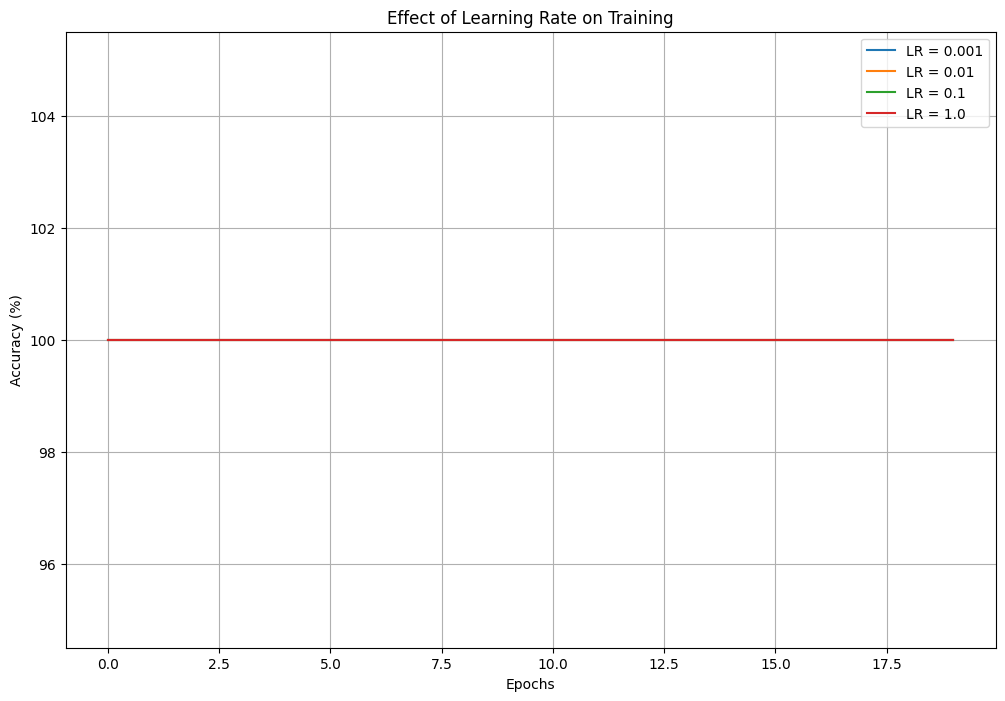

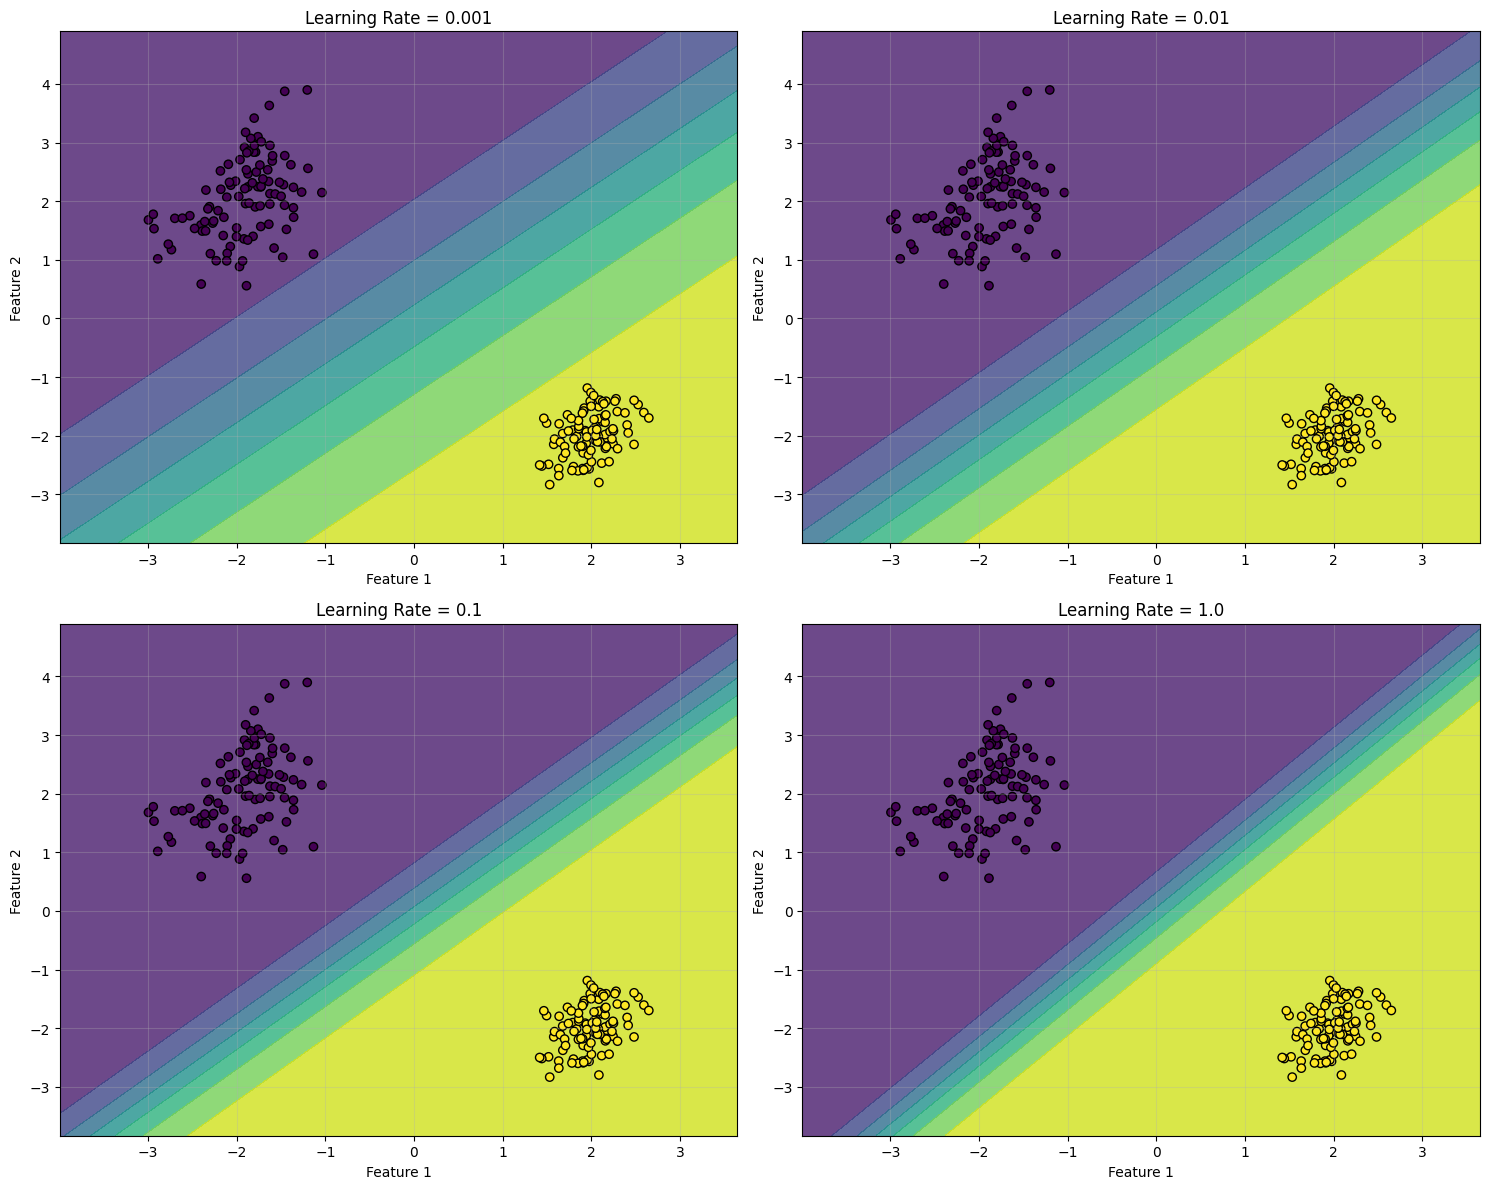

In [7]:

# Task 5: Experimentation with Learning Rates
def experiment_with_learning_rates(X, y, learning_rates):
    results = {}

    for lr in learning_rates:
        print(f"\nTraining with learning rate: {lr}")
        model = Perceptron(input_dim=2, learning_rate=lr)
        accuracies, _ = train_perceptron(model, X, y, epochs=20)
        results[lr] = {
            'model': model,
            'accuracies': accuracies
        }

    return results

# Run experiments with different learning rates
learning_rates = [0.001, 0.01, 0.1, 1.0]
experiment_results = experiment_with_learning_rates(X, y, learning_rates)

# Plot comparison of learning rates
plt.figure(figsize=(12, 8))
for lr, result in experiment_results.items():
    plt.plot(result['accuracies'], label=f'LR = {lr}')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Effect of Learning Rate on Training')
plt.legend()
plt.grid(True)
plt.show()

# Plot decision boundaries for different learning rates
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, lr in enumerate(learning_rates):
    model = experiment_results[lr]['model']

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Get predictions for each point in the mesh
    Z = np.zeros(xx.shape)
    for j in range(xx.shape[0]):
        for k in range(xx.shape[1]):
            point = torch.tensor([xx[j, k], yy[j, k]], dtype=torch.float32)
            Z[j, k] = model.forward(point).item()

    # Plot decision boundary
    axes[i].contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
    axes[i].set_title(f'Learning Rate = {lr}')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



Analysis of results

In [8]:
# Analysis of results
print("\nAnalysis of Learning Rate Effects:")
for lr, result in experiment_results.items():
    final_accuracy = result['accuracies'][-1]
    convergence_epoch = next((i for i, acc in enumerate(result['accuracies'])
                              if acc > 95), len(result['accuracies']))

    print(f"Learning Rate {lr}:")
    print(f"  Final Accuracy: {final_accuracy:.2f}%")
    if convergence_epoch < len(result['accuracies']):
        print(f"  Converged at epoch {convergence_epoch}")
    else:
        print(" Did not converge to >95% accuracy")
    print()


Analysis of Learning Rate Effects:
Learning Rate 0.001:
  Final Accuracy: 100.00%
  Converged at epoch 0

Learning Rate 0.01:
  Final Accuracy: 100.00%
  Converged at epoch 0

Learning Rate 0.1:
  Final Accuracy: 100.00%
  Converged at epoch 0

Learning Rate 1.0:
  Final Accuracy: 100.00%
  Converged at epoch 0

